In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# 评估模型 #

在数据科学中，*模型*是关于数据的一套假设。通常，模型包括用来生成数据的随机过程的假设。

有时，数据科学家需要决定一个模型是否足够好。在本节中，我们将讨论一个如何做出这样决定的例子。

## 陪审团选择 ##

数据科学可以成为揭示我们社会中种族主义和不平等的有力工具。本节讲述了一个案例，其中数据提供了陪审团选择中种族偏见的证据。

美国宪法第六修正案规定，“在所有刑事起诉中，被告有权享有州的公正陪审团的迅速和公开审判，犯罪发生的州和地区。”

一个*公正*陪审团的特征之一是，它应该从代表相关地区人口的陪审团名单中选出。陪审团名单是一群被选为潜在陪审员的人。最终审判陪审团是从他们中间通过有意的包含或排除选出的，因此可以有任何组成。但是，从中选出审判陪审团的大名单必须代表人口。

陪审团名单是否真正代表一个地区的人口的问题具有重要的法律意义。如果人口中的某个群体在陪审团名单上系统没有被很好地代表，这可能引发关于陪审团是否公正的问题，从而质疑被告是否得到了正当程序。

这就是罗伯特·斯温（Robert Swain）在美国最高法院案件中的问题，他是一名在1962年被阿拉巴马州塔拉德加县判罪的黑色人种。他一路上诉到美国最高法院，理由是塔拉德加县的陪审团中系统地排除了黑人。最高法院驳回了他的上诉，罗伯特·斯温后来被判处终身监禁。

然而，我们下面的分析显示，数据并不支持法院得出的结论。相反，数据显示陪审团选择过程中存在偏见。这种刑事司法系统中的偏见反映了当时普遍存在的对黑人的偏见和不公正。

我们将从数字细节开始看。在审判时，只有21岁或以上的男性才有资格在塔拉德加县担任陪审员。在该人口中，26%的男性是黑人。在罗伯特·斯温的审判中，陪审员是从一群本应代表合格陪审员人口的人中选出的，这是陪审团审判中的常见做法。但在100名男性组成的名单中，只有8名男性（即8%）是黑人。

作为上诉的一部分，罗伯特·斯温质疑了这一差异。此外，他指出，在过去的10年中，塔拉德加县的所有陪审团名单中只有很少一部分是黑人陪审员。

美国最高法院审查了上诉并得出结论，“整体百分比差异一直很小。”但是，这种说法合理吗？如果陪审员是从该县的合格人口中随机选出的，会有一些偶然的变化。我们不会在每个100人的名单上正好得到26名黑人。但我们会期望只有8名吗？

答案是否定的。我们将证明这一点，然后讨论其中涉及的许多偏见。


## 随机选择模型 ##

关于数据的一种观点——换句话说，是一个模型——是陪审团名单是随机选出的，由于偶然性，最终名单中黑人陪审员数量较少。

既然陪审团名单本应类似于所有合格陪审员的人口，那么随机选择模型对于评估就很重要了。让我们来看看这个模型是否能经得起仔细审查。

该模型详细规定了偶然过程。它指出数据就像是从一个26%人口为黑人的总体中随机抽取的样本。我们有很好的条件来评估这个模型，原因如下：

- 我们可以根据模型模拟数据。也就是说，我们可以模拟从一个26%为黑人的总体中随机抽取。
- 我们的模拟将展示一个陪审团名单在随机选择时的样子。
- 然后，我们可以将模拟结果与实际陪审团名单的组成进行比较。
- 如果我们的模拟结果与审判中陪审团名单的组成不一致，这将是对随机选择模型的反证。因此，它也将是对审判公正性的反证。

让我们一步步地了解这个过程。

## 统计量 ##

首先，我们必须选择一个要模拟的统计量。这个统计量必须能够帮助我们决定是接受模型还是接受关于数据的其他观点。模型认为陪审团名单是从合格人口中随机抽取的。罗伯特·斯温的观点是陪审团名单中的黑人陪审员太少，不可能随机抽取。因此，一个自然的统计量是样本中黑人陪审员的数量或*计数*。统计量值较小将支持罗伯特·斯温的观点。

## 在模型下模拟统计量 ##

如果模型是正确的，那么统计量通常会有多大？为了回答这个问题，我们将模拟在随机选择假设下的统计量，并查看结果分布。

### 模拟统计量的一次值 ###

我们可以使用 `sample_proportions` 来模拟统计量的一次值。样本大小是100，即陪审团名单的大小。我们将从中抽取的分布是合格陪审员人口中的分布。由于26%的合格陪审员是黑人，我们将从由比例 [0.26, 0.74] 指定的分布中进行抽样。


In [2]:
sample_size = 100
eligible_population = [0.26, 0.74]

输出数组 `sample_proportions` 中的类别与输入数组中的顺序相同。因此，随机样本中黑人陪审员的比例是输出数组的 `item(0)` 。多次运行下面的单元格，观察随机选取的小组中黑人陪审员的比例变化。你有没有看到低至0.08的值？


In [3]:
sample_proportions(sample_size, eligible_population).item(0)

0.27

每个类别的数量是样本大小与相应比例的乘积。因此，我们也可以轻松地模拟数量，而非比例。

让我们定义一个函数来完成这个任务。这个函数将随机选取一个陪审团，并返回其中黑人陪审团成员的数量。


In [4]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

### 模拟统计量的多个值 ###

我们研究的重点是计数数据的变异性。让我们通过 `for` 循环生成 10,000 个计数数据的模拟值，并观察它们的变化。在这个过程中，我们将把这些模拟值收集到一个数组中。


In [5]:
counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

## 随机选择模型下的预测结果 ##

为了更好地理解模拟结果，我们可以通过绘制模拟计数的经验直方图来直观展示这些数据。


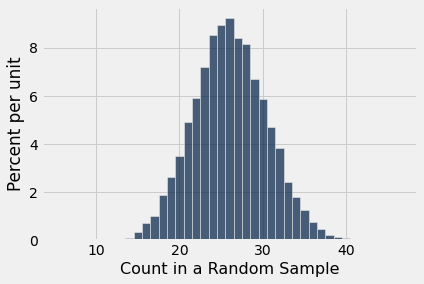

In [6]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))

直方图展示了随机选择模型对统计量——即样本中黑人陪审团成员数量——的预测结果。

为了得到每个模拟计数，我们从包含 26% 黑人的总体中随机抽取了 100 次。因此，正如预期，大多数模拟计数围绕在 26 左右。它们并不精确地等于26，存在一定的变化。计数值在 15 到 40 之间波动。

## 比较预测结果与实际数据 ##

在为审判选取的陪审团中，有八位黑人陪审团成员。在重新绘制的模拟计数直方图中，水平轴上的值 8 用红色点标记。这个红点位于直方图的左侧尾部较远的位置。在随机选择模拟的 10,000 个计数中，只有极少数是小于等于 8 。

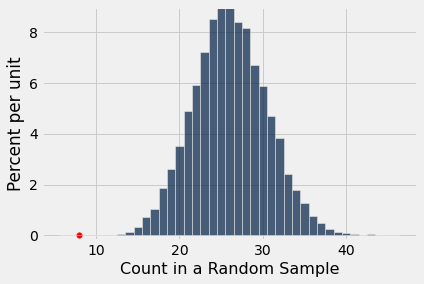

In [7]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

## 数据分析结论 ##

上面的图表直观地展示了选择过程中的偏差。它显示，如果我们从合格的陪审员人口中随机选择一个 100 人的陪审团，得到像审判中观察到的八位黑人陪审团成员这样的低数量是非常不可能的。

这是陪审团成员随机选择模型与陪审团数据不一致的证据。尽管陪审团可能是偶然产生的，但我们的模拟清楚地表明这种情况极为不可能。

审判陪审团的实际状况与模型假设的从合格人口中随机选择的情况有很大差异。当数据与模型不一致时，很难证明模型的合理性。数据是真实的，而模型只是一系列假设。当假设与实际情况不符时，我们必须质疑这些假设。

因此，最合理的结论是，对于这个陪审团，随机选择假设是不合理的。换句话说，最合理的结论是，陪审团并不是通过对合格陪审员人口进行随机抽样来选择的。尽管最高法院持不同意见，但 26% 和 8% 之间的差异并不小到仅凭偶然就能解释。


## 统计偏差 ##

上述分析为 Robert Swain 审判中的不公正现象提供了定量证据。数据显示，他应有的公正陪审团权利被剥夺了。

额外数据显示，排除黑人陪审团成员的现象是普遍存在的。1965 年最高法院的判决书中引用了 Robert Swain 提供的数据，指出“自 1953 年以来，从陪审团名单中抽取的陪审团中，黑人的比例仅为 10% 到 15% 。”观察上面直方图中 10% 和 15% 的位置。这样的比例在从合格人口中随机选择的情况下也是非常不可能的。

当一个过程产生的错误系统地偏向一个方向——比如黑人陪审团成员的比例总是低于预期——数据科学家会说这个过程是存在偏见的。量化这种偏差是数据科学的重要责任。

本节中的论点现在在法庭上出现得更加频繁。在 20 世纪 60 年代，最高法院查看了数据，但得出了错误的结论，认为“整体百分比差异很小”。对于“小”的定义，依赖大多数法院认为似乎合理的东西是错误的。关于什么是合理的观点不仅是纯粹主观的，而且容易受到普遍存在的种族偏见的影响。如果案件中的论点包括了本节的定量分析，法院可能不会得出百分比差异很小的结论。


## 种族偏见

选择过程中的统计偏差源于当时法律系统根深蒂固的种族偏见。

例如，最高法院的判决书中提到，Talladega 县的陪审团名单是从陪审员委员会从“城市名录、登记名单、俱乐部和教堂名单、与社区内其他人的对话，包括白人和非白人，以及个人和商业熟人”中获取的名字中选出的。这个过程明显对黑人持有偏见，并有利于委员会社会和职业圈中的人。这种系统性地将黑人排除在陪审团名单之外，意味着很少有黑人被选入陪审团。

即使有黑人陪审团成员，他们通常也不会进入最终陪审团。在 Robert Swain 的陪审团名单上的八位黑人中，两位被免职，六位在所谓的任意挑战（peremptory challenge）过程中被检方排除。在这个过程中，双方律师可以无需提供理由地排除或“罢免”一定数量的陪审团成员。

反对任意挑战的不公平性是 Robert Swain 上诉的一个重要部分。他指出，“检方一直一致且系统地使用他们的罢免权，阻止任何和所有黑人陪审团成员在陪审团中服务。”法院承认，在Talladega 县，任何民事或刑事案件中从未有过黑人陪审员。但它仍然驳回了上诉。

法律系统中的种族偏见源于社会偏见。对黑人的偏见和不公正已经存在了很长时间，以至于在社会的许多部分，它几乎成了一种正常的思维和行为方式。作为社会成员，最高法院的法官们对此并非免疫。法院多数派将他们的决定呈现为对法律最合适和最合乎逻辑的解释。但这并不是事实。法院关于任意挑战的决定在经过20年的法律斗争后最终被推翻。

Robert Swain 对抗的是一个对他不利的刑事司法系统。在这里，我们能够揭露他面临的系统性偏见和种族主义的一个方面，这也是许多其他黑人一直在抗争的问题。对许多人来说，这场斗争至今仍在继续。我们相信，数据科学可以成为一个强大的盟友。

Robert Swain在美国最高法院的代理律师是 [Constance Baker Motley](https://en.wikipedia.org/wiki/Constance_Baker_Motley)，她是首位在这法院辩论案件的非裔美国女性。她在最高法院辩论了10个案件，只输掉了Robert Swain在1965年的案件。

[Thurgood Marshall](https://en.wikipedia.org/wiki/Thurgood_Marshall)，在1967年成为首位非裔美国最高法院大法官，曾研究过Robert Swain案件的法院判决，并推动取消仅基于种族的任意挑战。这在1986年的最高法院案件 [Batson v. Kentucky](https://supreme.justia.com/cases/federal/us/476/79/)中实现。

但是Marshall对Batson决定的效力表示担忧。他预计一些法律团队会通过寻找表面上种族中立的方式来排除黑人陪审员。在他的[意见](https://supreme.justia.com/cases/federal/us/476/79/#tab-opinion-1956655)中，他与法院多数派意见一致，并建议更进一步，完全禁止任意挑战。他的结论是，“我赞扬法院的裁决，认为基于种族的任意挑战违反了平等保护条款，我加入了法院的意见。然而，只有完全禁止任意挑战，才能结束这种歧视。”Thurgood Marshall的担忧是具有预见性的，正如你将在以下一些阅读材料中看到的。

2013年，Constance Baker Motley 被追授国会金质奖章 [Congressional gold medal](https://www.congress.gov/bill/113th-congress/house-bill/3097/text?r=5&s=1)，以表彰她为美国做出的持久贡献和服务。在支持该奖项的声明中，众议院成员写道，“ Constance Baker Motley 在美国最高法院的唯一败诉案件是 Swain v. Alabama, 380 U.S. 202 (1965)，在该案中，法院拒绝禁止涉及非裔美国被告的基于种族的任意挑战，这一立场后来在 Batson v. Kentucky, 476 U.S. 79 (1986)案中被推翻，其依据主要是 Constance Baker Motley 在Swain 案中提出的主张。”

Thurgood Marshall 和 Constance Baker Motley 之间还有其他联系。例如，在哥伦比亚法学院学习期间， Baker Motley 曾作为 Marshall 的法律实习生。几年后，她撰写了具有里程碑意义的民权案件 Brown v. Board of Education in Topeka 的原始诉状，该案由Thurgood Marshall在1954年赢得。

[NAACP Legal Defense and Educational Fund](https://www.naacpldf.org/) 辩论了Robert [Swain's case](https://www.naacpldf.org/press-release/ldf-marks-anniversary-of-batson-decision-reaffirms-importance-of-impartial-jury-selection/)，后来又支持了 Batson 案。

尽管有 Batson 决定，陪审团选择中的种族偏见仍然存在。法律学者、伯克利法学院校友[Richard L. Harris Jr.](https://www.thehistorymakers.org/biography/robert-lewis-harris)提供了关于任意挑战如何延续偏见的[详细描述](https://scholarship.law.wm.edu/cgi/viewcontent.cgi?article=1944&context=wmlr)。

在他们的2020年报告 [Whitewashing the Jury Box](http://www.clrc.ca.gov/CRPC/Pub/Panelist_Materials/PM-20210325-Semel.pdf): How California Perpetuates the Discriminatory Exclusion of Black and Latinx Jurors 中，[Professor Elisabeth Semel](https://www.law.berkeley.edu/our-faculty/faculty-profiles/elisabeth-semel/) 和伯克利法学院死刑诊所的合著者描述了加州法院的经验如何证明Thurgood Marshall对Batson裁决有效性的担忧。

美国最高法院在 Swain v. Alabama 案件中的[判决](https://supreme.justia.com/cases/federal/us/380/202/)可能会令人不安。我们之所以包括它，是因为本节中有一些摘录引用了该判决。
